# **Gradient Descent**

## Example: Minimizing single variable function

### Consider the following single variable function $$f(x) = 0.1x^2 + sin(0.1x^2)$$ and suppose we find its minimum using gradient descent. Gradient descent requires us to compute the first derivative which is $$f'(x) = 0.2x + 0.2xcos(0.1x^2).$$ The plot for f(x) is shown below.

In [1]:
# Matrix computations
from numpy import *

#Plotting
from matplotlib.pyplot import *

# Changing size of figures
fig_size=[9,7]
rcParams["figure.figsize"]=fig_size

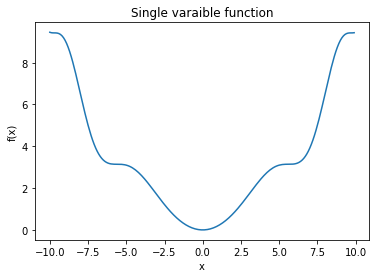

In [2]:
# Define f(x)

def f(x):
  
  #f(x)=0.1*x^2+sin(0.1*x^2)
  return 0.1*(x**2) + sin(0.1*(x**2))

# Plot f(x) on a given range
def plotf(x,xdots,label):

  # compute y values
  y = f(x)

  # plot (x,f(x))
  plot(x,y)
  xlabel("x")
  ylabel("f(x)")
  title(label)

  # plot points on f(x)
  plot(xdots,f(xdots),"bo")
  show()

# plot f(x) from (-10,10)
x=arange(-10,10,0.1)
plotf(x,np.array([]),"Single varaible function")


In [3]:
# f'(x)
def derivative(x):
  return 0.2*x + 0.2*x*(cos(0.1*(x**2)))

### Now that we have defined $f(x)$ and $f'(x)$, let us run gradient descent for different initial values and learning parameters and try to compute the global minimum. 

In [7]:
## Writing a function for calculating the gradient descent
def grad_descent(derivative,x_prev,learning_rate):

  # Deciding when to stop the algorithm
  epsilon=0.0001

  #Defining x_next
  x_next = x_prev - learning_rate*derivative(x_prev)

  # Setting the number of iterations
  grad_iter = 1

  # Update the sequence where we store all the x_next
  sequence=np.array([])
  sequence=np.append(sequence,x_next)

  # Start iterating
  while abs(x_next-x_prev)>epsilon:

    #Setting our x_prev to x_next
    x_prev=x_next

    # calculating the next x_next
    x_next = x_prev - learning_rate * derivative(x_prev)

    # update sequence
    sequence=np.append(sequence,x_next)

    # Updating the number of iterations to know exactly the number of iterations it took for us to get to the final value
    grad_iter += 1

  return x_next,sequence,grad_iter

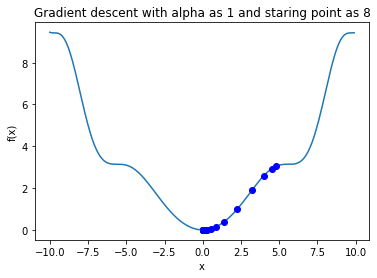

In [12]:
grad_output = grad_descent(derivative,8,1)
plotf(x,grad_output[1],"Gradient descent with alpha as 1 and staring point as 8")


In [ ]:
grad_output

## Using a small learning rate

### The example below uses a smaller than ideal learning rate of $\lambda = 0.1.$ Not only does this increase the number of gradient descent itterations to 105, but the algorithm coverges to one of the local minima. 

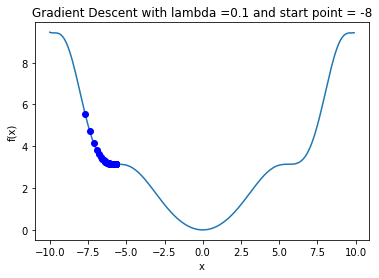

In [13]:
grad_output = grad_descent(derivative,-8,0.1)
plotf(x,grad_output[1],"Gradient Descent with lambda =0.1 and start point = -8")

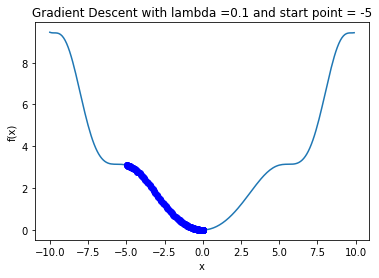

In [15]:
grad_output = grad_descent(derivative,-5,0.1)
plotf(x,grad_output[1],"Gradient Descent with lambda =0.1 and start point = -5")

In [16]:
grad_output[2]

212

## Initial value and learning rate are important

### From the above exercises of changing the initial value and learning rate we can conclude that gradient descent is not guaranteed to converge to the global minimum. Having a really low learning rate can make convergence slower (more iterations before finding minimum) and make it more likely to get stuck at local minima. A very high learning rate may be even more problematic as gradient descent may never converge (try $\lambda$ = 6 in the code). The initial value is also important for finding the global minimum. If we start close to the global minimum, we are more likely to find it in the above example even with a smaller than ideal learning rate.

### The diagram below shows even with multiple variables different initial values can lead to different local minima from gradient descent.